<a href="https://colab.research.google.com/github/RyuMinSu/project/blob/master/%ED%95%9C%EA%B5%AD%EC%B2%B4%EB%8C%80_%EA%B3%B5%EB%AA%A8%EC%A0%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
!apt -qq -y install fonts-nanum
fontpath = "/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf"
font = fm.FontProperties(fname=fontpath, size=14).get_name()
print(font)
plt.rc("font", family=font)
# fm._rebuild()
mpl.rcParams["axes.unicode_minus"]

import seaborn as sns

from plotnine import *

import folium

import warnings
warnings.filterwarnings("ignore")

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
NanumBarunGothic


#0. 데이터준비

In [ ]:
df = pd.read_csv("소상공인시장진흥공단_상가(상권)정보_서울_202112.csv")
df = df[["상호명", "상권업종대분류명", "상권업종중분류명", "상권업종소분류명","시도명", "시군구명", "도로명주소", "경도", "위도"]]
df.head()

상호명 상권업종대분류명   상권업종중분류명   상권업종소분류명    시도명  시군구명  \
0       제중건강원       소매    건강/미용식품        건강원  서울특별시  영등포구   
1       민속악기사       소매  취미/오락관련소매       악기판매  서울특별시   성동구   
2       태평양진주       소매   시계/귀금속소매     시계/귀금속  서울특별시   종로구   
3  김선희꼼꼼국어교습소    학문/교육  학원-보습교습입시      학원-입시  서울특별시   송파구   
4         비지트       음식         한식  한식/백반/한정식  서울특별시   서초구   

                     도로명주소          경도         위도  
0  서울특별시 영등포구 영중로14길 11-17  126.907168  37.520613  
1         서울특별시 성동구 용답5길 2  127.049018  37.566857  
2     서울특별시 종로구 서순라길 17-10  126.993530  37.571848  
3    서울특별시 송파구 위례성대로12길 31  127.121520  37.510967  
4      서울특별시 서초구 동광로18길 82  126.991394  37.488375

In [ ]:
#대분류: 스포츠
#중분류: 헬스클럽
#소분류: 헬스클럽

df_seoul = df[df["시도명"]=="서울특별시"]

cond1 = df_seoul["상권업종대분류명"] == "스포츠"
cond2 = df_seoul["상권업종중분류명"] == "실내운동시설"
cond3 = df_seoul["상권업종중분류명"] == "실외운동시설"
cond4 = df_seoul["상권업종소분류명"] == "헬스클럽"

df_seoul_filter = df_seoul[(cond1) & ((cond2)|(cond3)) & (cond4)]
df_seoul_filter.head()

상호명 상권업종대분류명 상권업종중분류명 상권업종소분류명    시도명 시군구명                 도로명주소  \
229   CC커뮤니케이션      스포츠   실내운동시설     헬스클럽  서울특별시  광진구  서울특별시 광진구 아차산로73길 48   
257     바디스토리짐      스포츠   실내운동시설     헬스클럽  서울특별시  도봉구  서울특별시 도봉구 도봉로145길 51   
959       스타트짐      스포츠   실내운동시설     헬스클럽  서울특별시  성동구   서울특별시 성동구 왕십리로21길 6   
1053   김경영에어로빅      스포츠   실내운동시설     헬스클럽  서울특별시  중랑구      서울특별시 중랑구 봉우재로 4   
1273     소울&바디      스포츠   실내운동시설     헬스클럽  서울특별시  서초구  서울특별시 서초구 서초대로55길 17   

              경도         위도  
229   127.102417  37.546722  
257   127.039669  37.664516  
959   127.033372  37.561801  
1053  127.073985  37.589113  
1273  127.015094  37.496188

In [ ]:
#사본 만들기
df_seoul_filter2 = df_seoul_filter.copy().reset_index(drop=True)
df_seoul_filter2.head()

상호명 상권업종대분류명 상권업종중분류명 상권업종소분류명    시도명 시군구명                 도로명주소  \
0  CC커뮤니케이션      스포츠   실내운동시설     헬스클럽  서울특별시  광진구  서울특별시 광진구 아차산로73길 48   
1    바디스토리짐      스포츠   실내운동시설     헬스클럽  서울특별시  도봉구  서울특별시 도봉구 도봉로145길 51   
2      스타트짐      스포츠   실내운동시설     헬스클럽  서울특별시  성동구   서울특별시 성동구 왕십리로21길 6   
3   김경영에어로빅      스포츠   실내운동시설     헬스클럽  서울특별시  중랑구      서울특별시 중랑구 봉우재로 4   
4     소울&바디      스포츠   실내운동시설     헬스클럽  서울특별시  서초구  서울특별시 서초구 서초대로55길 17   

           경도         위도  
0  127.102417  37.546722  
1  127.039669  37.664516  
2  127.033372  37.561801  
3  127.073985  37.589113  
4  127.015094  37.496188

# 1. kmeans 군집분석

In [ ]:
#데이터 분리
df_lat_lng = df_seoul_filter2[["경도", "위도"]]
df_lat_lng.head()

경도         위도
0  127.102417  37.546722
1  127.039669  37.664516
2  127.033372  37.561801
3  127.073985  37.589113
4  127.015094  37.496188

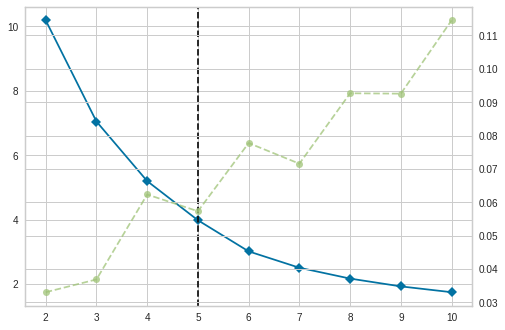

In [ ]:
#데이터 분리
df_lat_lng = df_seoul_filter2[["경도", "위도"]]
df_lat_lng.head()

#군집개수 결정(elbow)
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model)
viz = visualizer.fit(df_lat_lng)

#군집개수를 5개로 하여 군집 실시
k = 5

model = KMeans(n_clusters=k, random_state=10)
model.fit(df_lat_lng)
df_lat_lng["cluster"] = model.fit_predict(df_lat_lng)
df_lat_lng.head()

#군집결과 시각화(matplotlib)
fig = plt.figure(figsize=(15, 10))

plt.title("KMeans 군집분석 결과(k=5)")
for i in range(k):
  plt.scatter(x=df_lat_lng.loc[df_lat_lng["cluster"]==i, "경도"],
              y=df_lat_lng.loc[df_lat_lng["cluster"]==i, "위도"],
              label="cluster" + str(i))

plt.legend()
plt.axis("off")

In [ ]:
#군집개수를 5개로 하여 군집 실시
k = 5

model = KMeans(n_clusters=k, random_state=10)
model.fit(df_lat_lng)
df_lat_lng["cluster"] = model.fit_predict(df_lat_lng)
df_lat_lng.head()

경도         위도  cluster
0  127.102417  37.546722        4
1  127.039669  37.664516        2
2  127.033372  37.561801        2
3  127.073985  37.589113        2
4  127.015094  37.496188        0

(126.78374074351035, 127.19345825104266, 37.42914108664401, 37.697398784598185)

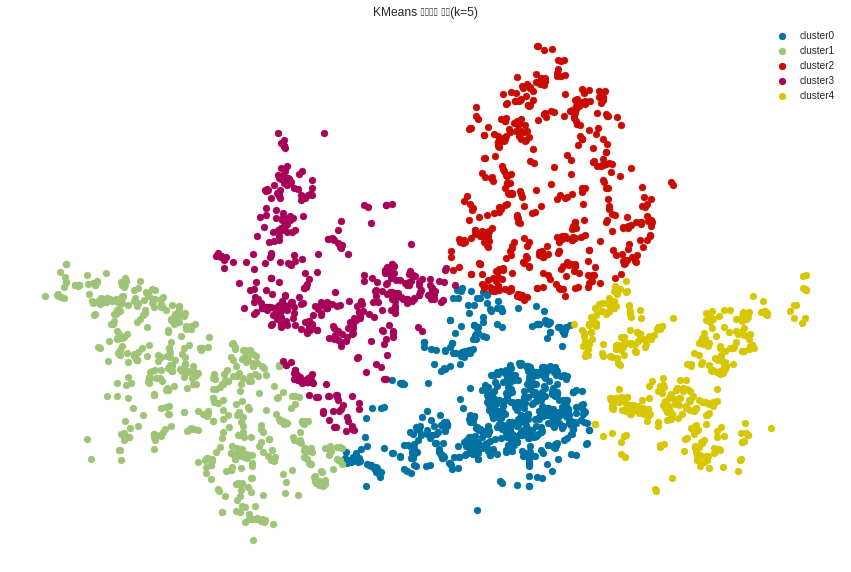

In [ ]:
#군집결과 시각화(matplotlib)
fig = plt.figure(figsize=(15, 10))

plt.title("KMeans 군집분석 결과(k=5)")
for i in range(k):
  plt.scatter(x=df_lat_lng.loc[df_lat_lng["cluster"]==i, "경도"],
              y=df_lat_lng.loc[df_lat_lng["cluster"]==i, "위도"],
              label="cluster" + str(i))

plt.legend()
plt.axis("off")

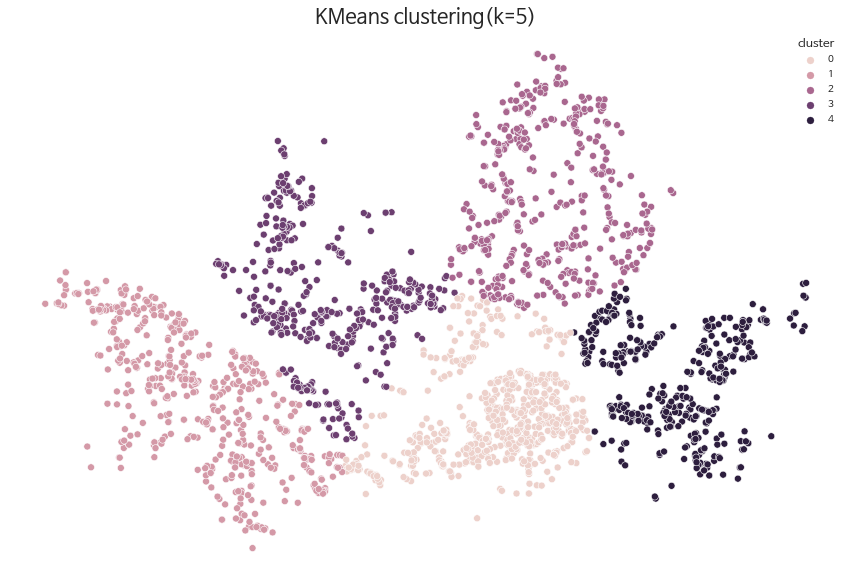

In [ ]:
#군집결과 시각화(seaborn)
fig = plt.figure(figsize=(15, 10))
plt.title("KMeans clustering(k=5)", size=20)
sns.scatterplot(data=df_lat_lng, x="경도", y="위도", hue="cluster")
plt.axis("off")
plt.show();

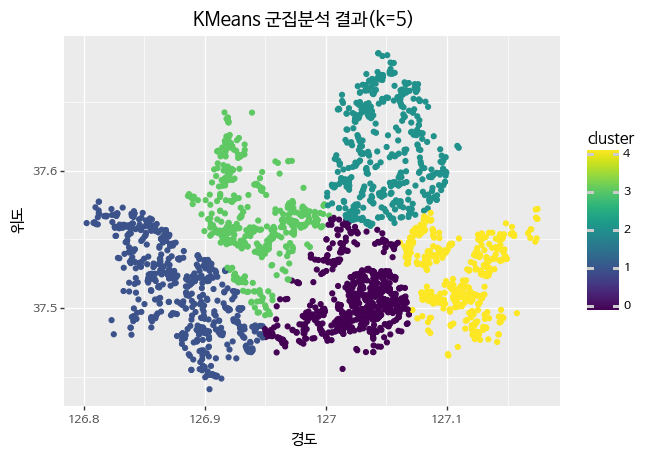

<ggplot: (8777959620545)>

In [ ]:
#군집결과 시각화(ggplot)
(ggplot(df_lat_lng)
+ aes(x="경도", y="위도", color="cluster", axis=False)
+ geom_point()
+ theme(text=element_text(family="NanumBarunGothic"))
+ ggtitle("KMeans 군집분석 결과(k=5)"))

In [ ]:
#데이터 합치기
df_seoul_filter2["cluster"] = df_lat_lng["cluster"]
df_seoul_filter2.head()

상호명 상권업종대분류명 상권업종중분류명 상권업종소분류명    시도명 시군구명                 도로명주소  \
0  CC커뮤니케이션      스포츠   실내운동시설     헬스클럽  서울특별시  광진구  서울특별시 광진구 아차산로73길 48   
1    바디스토리짐      스포츠   실내운동시설     헬스클럽  서울특별시  도봉구  서울특별시 도봉구 도봉로145길 51   
2      스타트짐      스포츠   실내운동시설     헬스클럽  서울특별시  성동구   서울특별시 성동구 왕십리로21길 6   
3   김경영에어로빅      스포츠   실내운동시설     헬스클럽  서울특별시  중랑구      서울특별시 중랑구 봉우재로 4   
4     소울&바디      스포츠   실내운동시설     헬스클럽  서울특별시  서초구  서울특별시 서초구 서초대로55길 17   

           경도         위도  cluster  
0  127.102417  37.546722        4  
1  127.039669  37.664516        2  
2  127.033372  37.561801        2  
3  127.073985  37.589113        2  
4  127.015094  37.496188        0

In [ ]:
#권역별 개수 확인
print(df_seoul_filter2["cluster"].value_counts())
print()

print(df_seoul_filter2[df_seoul_filter2["cluster"]==0]["시군구명"].value_counts())
print()

print(df_seoul_filter2[df_seoul_filter2["cluster"]==1]["시군구명"].value_counts())
print()

print(df_seoul_filter2[df_seoul_filter2["cluster"]==2]["시군구명"].value_counts())
print()

print(df_seoul_filter2[df_seoul_filter2["cluster"]==3]["시군구명"].value_counts())
print()

print(df_seoul_filter2[df_seoul_filter2["cluster"]==4]["시군구명"].value_counts())
print()

0    692
1    539
2    453
3    424
4    394
Name: cluster, dtype: int64

강남구    321
서초구    205
성동구     50
용산구     43
관악구     38
중구      18
동작구     17
Name: 시군구명, dtype: int64

강서구     156
양천구      90
영등포구     88
구로구      74
관악구      62
금천구      52
동작구      17
Name: 시군구명, dtype: int64

노원구     82
동대문구    80
도봉구     70
성북구     64
중랑구     54
강북구     53
성동구     24
중구      14
종로구     11
광진구      1
Name: 시군구명, dtype: int64

마포구     113
은평구      83
서대문구     61
중구       49
종로구      35
영등포구     34
동작구      27
용산구      22
Name: 시군구명, dtype: int64

송파구    173
광진구    102
강동구    101
강남구     15
성동구      3
Name: 시군구명, dtype: int64



In [ ]:
df_seoul_filter2.groupby("시군구명")["cluster"].count()

시군구명
강남구     336
강동구     101
강북구      53
강서구     156
관악구     100
광진구     103
구로구      74
금천구      52
노원구      82
도봉구      70
동대문구     80
동작구      61
마포구     113
서대문구     61
서초구     205
성동구      77
성북구      64
송파구     173
양천구      90
영등포구    122
용산구      65
은평구      83
종로구      46
중구       81
중랑구      54
Name: cluster, dtype: int64

# 2. 구별 헬스장수

In [ ]:
#군집별 헬스장수
df_result = pd.DataFrame(df_seoul_filter2.groupby(["cluster", "시군구명"])["상권업종소분류명"].count()).reset_index()
df_result = df_result.rename(columns={"상권업종소분류명":"헬스장점포수"})
print(df_result.shape)
df_result.head()


(37, 3)


cluster 시군구명  헬스장점포수
0        0  강남구     321
1        0  관악구      38
2        0  동작구      17
3        0  서초구     205
4        0  성동구      50

# 3. 구별 인구수

In [ ]:
#구별 인구수
df_gu_ingu = pd.read_excel("공모전/211231_서울시_구별인구.xlsx", header=None, index_col=None)

df_gu_ingu = df_gu_ingu.iloc[4:,[1,2]]
df_gu_ingu.rename(columns={1:"시군구", 2:"인구수"}, inplace=True)
df_ingu_result = df_gu_ingu.reset_index(drop=True)

df_ingu_result.head()
df_ingu_result = df_ingu_result.rename(columns={"시군구": "시군구명"})
df_ingu_result.head()

시군구명     인구수
0  종로구   73766
1   중구   63767
2  용산구  111207
3  성동구  134533
4  광진구  169483

In [ ]:
#데이터합치기
df_result2 = pd.merge(left=df_result, right=df_ingu_result, on="시군구명", how="left")
df_result2.head()

cluster 시군구명  헬스장점포수     인구수
0        0  강남구     321  234612
1        0  관악구      38  279353
2        0  동작구      17  186419
3        0  서초구     205  169895
4        0  성동구      50  134533

# 4. 구별 평균소득

In [ ]:
#평균소득
df_income = pd.read_excel("공모전/211231_지역사회조사_데이터.xlsx")

In [ ]:
df_income_new = df_income.loc[:, ["ID", "GU", "AAQ1", "JEW7", "JEW8"]]
df_income_new.rename(columns={"ID": "번호",
                              "GU": "구별코드",
                              "AAQ1": "평균소득"}, inplace=True)

(40441, 2)


시군구명       평균소득
0  강남구  3570568.0
1  강동구  2997324.0
2  강북구  3096179.0
3  강서구  2897901.0
4  관악구  2603980.0

In [ ]:
#데이터 합치기
df_result2 = pd.merge(left=df_result2, right=df_income_result, on="시군구명", how="left")
print(df_result2.shape)
df_result2.head()

(37, 5)


cluster 시군구명  헬스장점포수     인구수       평균소득
0        0  강남구     321  234612  3570568.0
1        0  관악구      38  279353  2603980.0
2        0  동작구      17  186419  2986681.0
3        0  서초구     205  169895  3459790.0
4        0  성동구      50  134533  3311064.0

# 5. 구별 평균연령

In [ ]:
df_age = pd.read_excel("공모전/211231_서울시_구별_평균연령.xlsx")
df_age = df_age.loc[1:,["지역", "전체평균연령"]]
df_age_result = df_age.rename(columns={"지역": "시군구명",
                       "전체평균연령": "평균연령"})
df_age_result.head()

시군구명  평균연령
1  종로구  45.4
2   중구  45.8
3  용산구  44.3
4  성동구  43.4
5  광진구  42.9

In [ ]:
#데이터 합치기
df_result2 = pd.merge(left=df_result2, right=df_age_result,
                      on="시군구명", how="left")
print(df_result2.shape)
df_result2.head()

(37, 6)


cluster 시군구명  헬스장점포수     인구수       평균소득  평균연령
0        0  강남구     321  234612  3570568.0  41.9
1        0  관악구      38  279353  2603980.0  42.9
2        0  동작구      17  186419  2986681.0  43.5
3        0  서초구     205  169895  3459790.0  41.7
4        0  성동구      50  134533  3311064.0  43.4

# 6. 구별 평균건축연도

In [ ]:
df_build = pd.read_excel("/공모전/201231_서울시_구별_건축연도.xlsx")
df_build = df_build[df_build["주택종류별"]=="아파트"]
df_build = df_build.reset_index(drop=True)

#결측값 제거
df_build.replace({"X":0}, inplace=True)

#컬럼명 변경
df_build.rename(columns={"2020년": 2020,
                         "2019년": 2019,
                         "2018년": 2018,
                         "2017년": 2017,
                         "2016년": 2016,
                         "2015년": 2015,
                         "2014년": 2014,
                         "2013년": 2013,
                         "2012": 2012,
                         "2011": 2011,
                         "2010": 2010,
                         "2005~2009년": 2007,
                         "2000~2004년": 2002,
                         "1990~1999년": 1995,
                         "1980~1989년": 1985}, inplace=True)

df_build = df_build.loc[1:,:].reset_index(drop=True)

#값에 연도 곱하기
columns_list = df_build.columns.tolist()[4:19]
for i in range(len(columns_list)):
  df_build[columns_list[i]] = df_build[columns_list[i]] * columns_list[i]

df_build.head()

기간  자치구 주택종류별     합계     2020     2019     2018     2017      2016  \
0  2020  종로구   아파트  15688   206040   563301        0  5215962         0   
1  2020   중구   아파트  26102   373700  1950354  1077612  2811698   1739808   
2  2020  용산구   아파트  37676  2337140  1691922   609436  1262642    137088   
3  2020  성동구   아파트  67584  1074640  2836695  3884650  3005330  11884320   
4  2020  광진구   아파트  32135   325220   530997  2346934  1369543     88704   

      2015     2014     2013     2012     2011     2010      2007      2002  \
0   816075   576004  1000461   225344   237298        0   6075189   6892886   
1    24180  1295002   235521   979844  4957115  1993920   6793695  14804790   
2  1408485  1252708   758901   559336  4959126  1431120   9527229  18716698   
3  3288480  3719858  1006500  8400100  2226177   172860  10372176  44858814   
4   407030   864006    58377  1187080   128704   279390   8505666   9971962   

       1995     1985  1979년 이전  
0   7174020   520070       975  
1   9701685   524040      1537  
2  13990935  5170925      5817  
3  28352940  9539910       397  
4  27491100  9271935       702

In [ ]:
#평균건축연도 산출
df_build_new = df_build.iloc[:,:-1]
df_build_new["평균건축연도"] = df_build_new.iloc[:,4:].sum(axis=1) / (df_build_new["합계"] - df_build["1979년 이전"])

#데이터 정리
df_build_result = df_build_new.loc[:, ["자치구", "평균건축연도"]]
df_build_result.rename(columns={"자치구": "시군구명"}, inplace=True)
print(df_build_result.shape)
df_build_result.head()

(25, 2)


시군구명       평균건축연도
0  종로구  2005.209679
1   중구  2005.412742
2  용산구  2003.003578
3  성동구  2003.712772
4  광진구  1998.748067

In [ ]:
#데이터 합치기
df_result2 = pd.merge(left=df_result2, right=df_build_result, on="시군구명", how="left")
print(df_result2.shape)
df_result2.head()

(37, 7)


cluster 시군구명  헬스장점포수     인구수       평균소득  평균연령       평균건축연도
0        0  강남구     321  234612  3570568.0  41.9  2000.206000
1        0  관악구      38  279353  2603980.0  42.9  2002.440993
2        0  동작구      17  186419  2986681.0  43.5  2001.954255
3        0  서초구     205  169895  3459790.0  41.7  2003.431516
4        0  성동구      50  134533  3311064.0  43.4  2003.712772

#7. 구별 가구형태 수

In [ ]:
df_fam = pd.read_excel("/공모전/201231_서울시_구별_가구형태.xlsx", header=1)
df_fam.head()

기간  자치구    동        계     1인가구     2인가구    3인가구    4인가구    5인가구   6인가구  \
0  2020   합계   합계  3982290  1390701  1033901  792690  602791  130122  25770   
1  2020  종로구   소계    63414    25983    16281   10882    7679    2027    440   
2  2020  종로구  사직동     3839     1487     1073     701     432     112     28   
3  2020  종로구  삼청동     1031      380      295     189     112      39     11   
4  2020  종로구  부암동     3773     1129     1089     772     552     176     39   

  7인이상 가구  
0    6315  
1     122  
2       6  
3       5  
4      16

In [ ]:
df_fam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   기간       451 non-null    int64 
 1   자치구      451 non-null    object
 2   동        451 non-null    object
 3   계        451 non-null    int64 
 4   1인가구     451 non-null    int64 
 5   2인가구     451 non-null    object
 6   3인가구     451 non-null    object
 7   4인가구     451 non-null    object
 8   5인가구     451 non-null    object
 9   6인가구     451 non-null    object
 10  7인이상 가구  451 non-null    object
dtypes: int64(3), object(8)
memory usage: 38.9+ KB


In [ ]:
#X 0으로 변경
df_fam.replace({"X":0}, inplace=True)

#데이터타입 변경
df_fam.iloc[:,3:] = df_fam.iloc[:, 3:].astype("float")

In [ ]:
#데이터 통합
df_fam["4인이상 가구"] = df_fam.iloc[:,7:].sum(axis=1)
df_fam.head()

기간  자치구    동          계       1인가구       2인가구      3인가구      4인가구  \
0  2020   합계   합계  3982290.0  1390701.0  1033901.0  792690.0  602791.0   
1  2020  종로구   소계    63414.0    25983.0    16281.0   10882.0    7679.0   
2  2020  종로구  사직동     3839.0     1487.0     1073.0     701.0     432.0   
3  2020  종로구  삼청동     1031.0      380.0      295.0     189.0     112.0   
4  2020  종로구  부암동     3773.0     1129.0     1089.0     772.0     552.0   

       5인가구     6인가구  7인이상 가구   4인이상 가구  
0  130122.0  25770.0   6315.0  764998.0  
1    2027.0    440.0    122.0   10268.0  
2     112.0     28.0      6.0     578.0  
3      39.0     11.0      5.0     167.0  
4     176.0     39.0     16.0     783.0

In [ ]:
df_fam = df_fam.iloc[1:,:].reset_index(drop=True)
df_fam_result = pd.pivot_table(data=df_fam, index="자치구", values=["1인가구", "2인가구", "3인가구", "4인이상 가구"]).reset_index()
df_fam_result.rename(columns={"자치구":"시군구명"}, inplace=True)
df_fam_result.head()

시군구명          1인가구         2인가구         3인가구      4인이상 가구
0  강남구   5999.913043  4480.956522  3713.304348  3964.956522
1  강동구   5296.421053  5025.105263  4152.421053  4172.631579
2  강북구   6526.428571  5204.571429  3608.714286  3203.857143
3  강서구   8206.857143  6207.142857  4544.857143  4288.476190
4  관악구  11748.454545  5105.636364  3061.000000  2717.409091

In [ ]:
#데이터 합치기
df_result2 = pd.merge(left=df_result2, right=df_fam_result, on="시군구명", how="left")

In [ ]:
print(df_result2.shape)
df_result2.head()

(37, 11)


cluster 시군구명  헬스장점포수     인구수       평균소득  평균연령       평균건축연도          1인가구  \
0        0  강남구     321  234612  3570568.0  41.9  2000.206000   5999.913043   
1        0  관악구      38  279353  2603980.0  42.9  2002.440993  11748.454545   
2        0  동작구      17  186419  2986681.0  43.5  2001.954255   8012.625000   
3        0  서초구     205  169895  3459790.0  41.7  2003.431516   4625.473684   
4        0  성동구      50  134533  3311064.0  43.4  2003.712772   4731.666667   

          2인가구         3인가구      4인이상 가구  
0  4480.956522  3713.304348  3964.956522  
1  5105.636364  3061.000000  2717.409091  
2  5186.125000  3989.750000  3781.875000  
3  4091.263158  3667.368421  4049.684211  
4  3596.444444  2780.333333  2467.555556

# cluster별 상관계수 확인

In [ ]:
df_result2.head(3)

cluster 시군구명  헬스장점포수     인구수       평균소득  평균연령       평균건축연도          1인가구  \
0        0  강남구     321  234612  3570568.0  41.9  2000.206000   5999.913043   
1        0  관악구      38  279353  2603980.0  42.9  2002.440993  11748.454545   
2        0  동작구      17  186419  2986681.0  43.5  2001.954255   8012.625000   

          2인가구         3인가구      4인이상 가구  
0  4480.956522  3713.304348  3964.956522  
1  5105.636364  3061.000000  2717.409091  
2  5186.125000  3989.750000  3781.875000

In [ ]:
#데이터타입 변환
df_result2["인구수"] = df_result2["인구수"].astype("float")
df_result2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 36
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cluster  37 non-null     int64  
 1   시군구명     37 non-null     object 
 2   헬스장점포수   37 non-null     int64  
 3   인구수      37 non-null     float64
 4   평균소득     37 non-null     float64
 5   평균연령     37 non-null     float64
 6   평균건축연도   37 non-null     float64
 7   1인가구     37 non-null     float64
 8   2인가구     37 non-null     float64
 9   3인가구     37 non-null     float64
 10  4인이상 가구  37 non-null     float64
dtypes: float64(8), int64(2), object(1)
memory usage: 3.5+ KB


In [ ]:
df_result2.iloc[:,2:] = df_result2.iloc[:,2:].round(1)
df_result2.head()

cluster 시군구명  헬스장점포수       인구수       평균소득  평균연령  평균건축연도     1인가구    2인가구  \
0        0  강남구     321  234612.0  3570568.0  41.9  2000.2   5999.9  4481.0   
1        0  관악구      38  279353.0  2603980.0  42.9  2002.4  11748.5  5105.6   
2        0  동작구      17  186419.0  2986681.0  43.5  2002.0   8012.6  5186.1   
3        0  서초구     205  169895.0  3459790.0  41.7  2003.4   4625.5  4091.3   
4        0  성동구      50  134533.0  3311064.0  43.4  2003.7   4731.7  3596.4   

     3인가구  4인이상 가구  
0  3713.3   3965.0  
1  3061.0   2717.4  
2  3989.8   3781.9  
3  3667.4   4049.7  
4  2780.3   2467.6

In [ ]:
df_cluster0 = df_result2[df_result2["cluster"]==0].iloc[:,1:]
df_cluster1 = df_result2[df_result2["cluster"]==1].iloc[:,1:]
df_cluster2 = df_result2[df_result2["cluster"]==2].iloc[:,1:]
df_cluster3 = df_result2[df_result2["cluster"]==3].iloc[:,1:]
df_cluster4 = df_result2[df_result2["cluster"]==4].iloc[:,1:]

df_cluster0

시군구명  헬스장점포수       인구수       평균소득  평균연령  평균건축연도     1인가구    2인가구    3인가구  \
0  강남구     321  234612.0  3570568.0  41.9  2000.2   5999.9  4481.0  3713.3   
1  관악구      38  279353.0  2603980.0  42.9  2002.4  11748.5  5105.6  3061.0   
2  동작구      17  186419.0  2986681.0  43.5  2002.0   8012.6  5186.1  3989.8   
3  서초구     205  169895.0  3459790.0  41.7  2003.4   4625.5  4091.3  3667.4   
4  성동구      50  134533.0  3311064.0  43.4  2003.7   4731.7  3596.4  2780.3   
5  용산구      43  111207.0  3249608.0  44.3  2003.0   4338.9  3051.9  2077.1   
6   중구      18   63767.0  2885928.0  45.8  2005.4   2852.2  1872.2  1162.6   

   4인이상 가구  
0   3965.0  
1   2717.4  
2   3781.9  
3   4049.7  
4   2467.6  
5   1791.1  
6    998.3

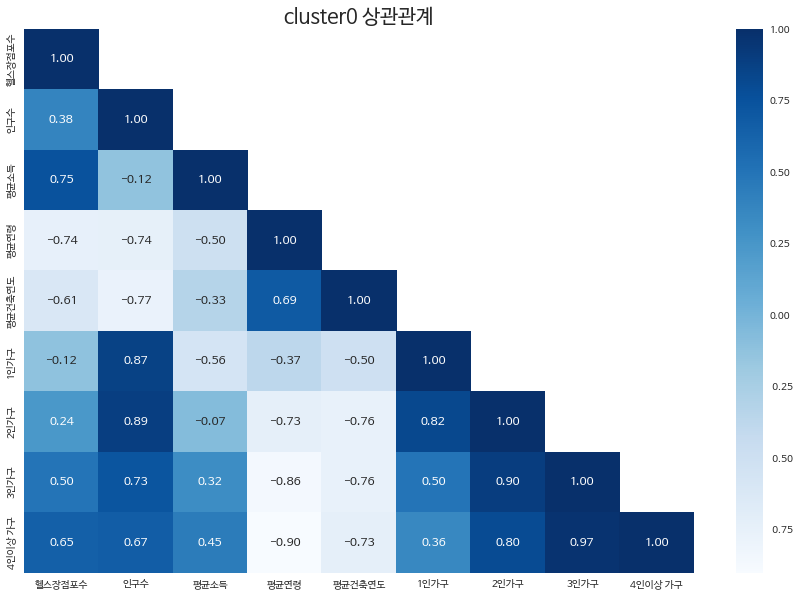

In [ ]:
#cluster=0 상관관계 시각화
corr = df_cluster0.corr()
mask = np.triu(np.ones_like(corr), k=1)

fit = plt.figure(figsize=(15, 10))
plt.title("cluster0 상관관계", size=20)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="Blues", mask=mask)


#cluster=1 상관관계 시각화
corr = df_cluster1.corr()
mask = np.triu(np.ones_like(corr), k=1)

fit = plt.figure(figsize=(15, 10))
plt.title("cluster1 상관관계", size=20)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="Blues", mask=mask)


#cluster=2 상관관계 시각화
corr = df_cluster2.corr()
mask = np.triu(np.ones_like(corr), k=1)

fit = plt.figure(figsize=(15, 10))
plt.title("cluster2 상관관계", size=20)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="Blues", mask=mask)


#cluster=3 상관관계 시각화
corr = df_cluster3.corr()
mask = np.triu(np.ones_like(corr), k=1)

fit = plt.figure(figsize=(15, 10))
plt.title("cluster3 상관관계", size=20)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="Blues", mask=mask)


#cluster=4 상관관계 시각화
corr = df_cluster4.corr()
mask = np.triu(np.ones_like(corr), k=1)

fit = plt.figure(figsize=(15, 10))
plt.title("cluster4 상관관계", size=20)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="Blues", mask=mask)

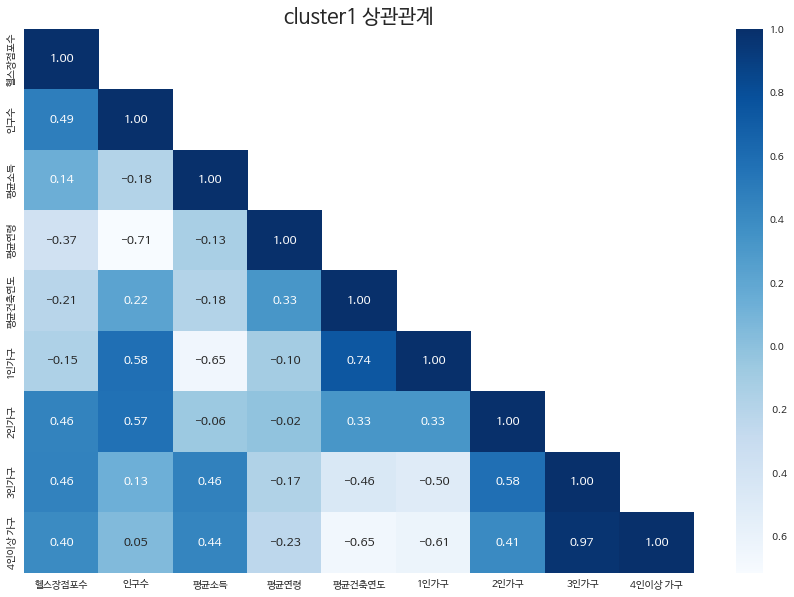

In [ ]:
#cluster=1 상관관계 시각화
corr = df_cluster1.corr()
mask = np.triu(np.ones_like(corr), k=1)

fit = plt.figure(figsize=(15, 10))
plt.title("cluster1 상관관계", size=20)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="Blues", mask=mask)

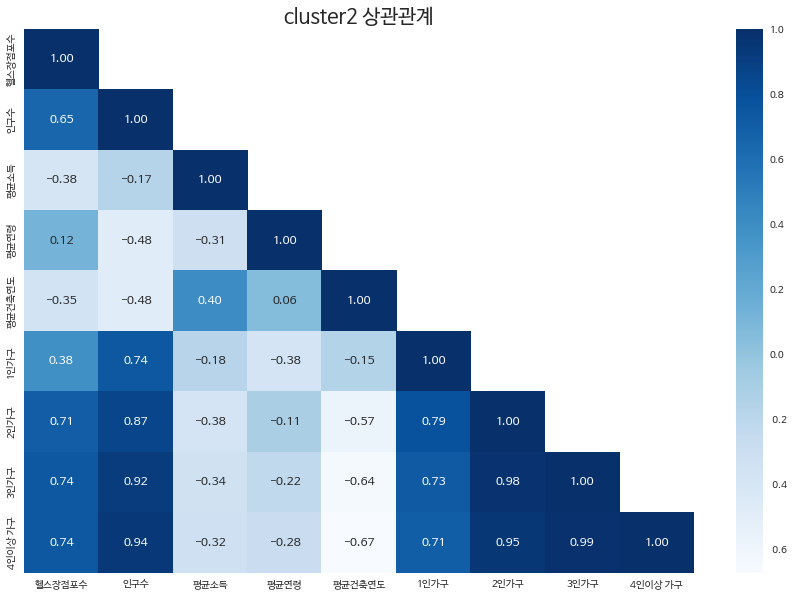

In [ ]:
#cluster=2 상관관계 시각화
corr = df_cluster2.corr()
mask = np.triu(np.ones_like(corr), k=1)

fit = plt.figure(figsize=(15, 10))
plt.title("cluster2 상관관계", size=20)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="Blues", mask=mask)

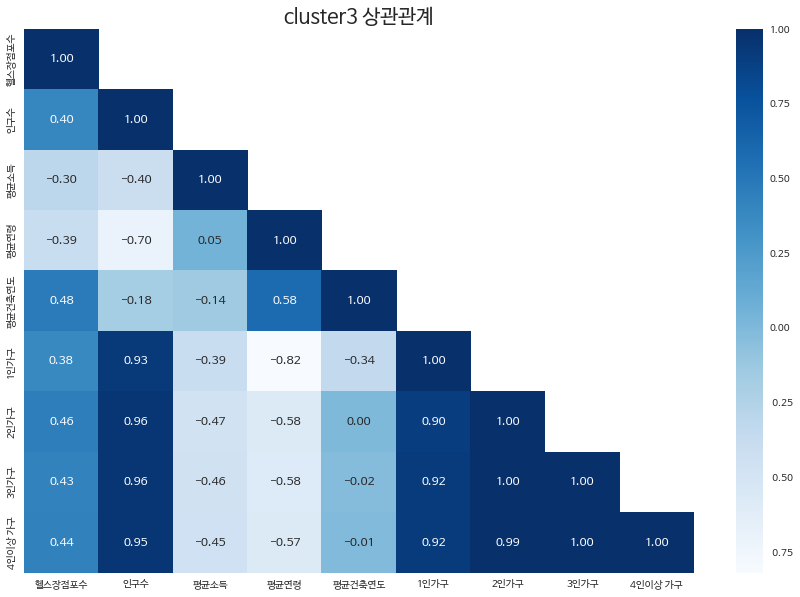

In [ ]:
#cluster=3 상관관계 시각화
corr = df_cluster3.corr()
mask = np.triu(np.ones_like(corr), k=1)

fit = plt.figure(figsize=(15, 10))
plt.title("cluster3 상관관계", size=20)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="Blues", mask=mask)

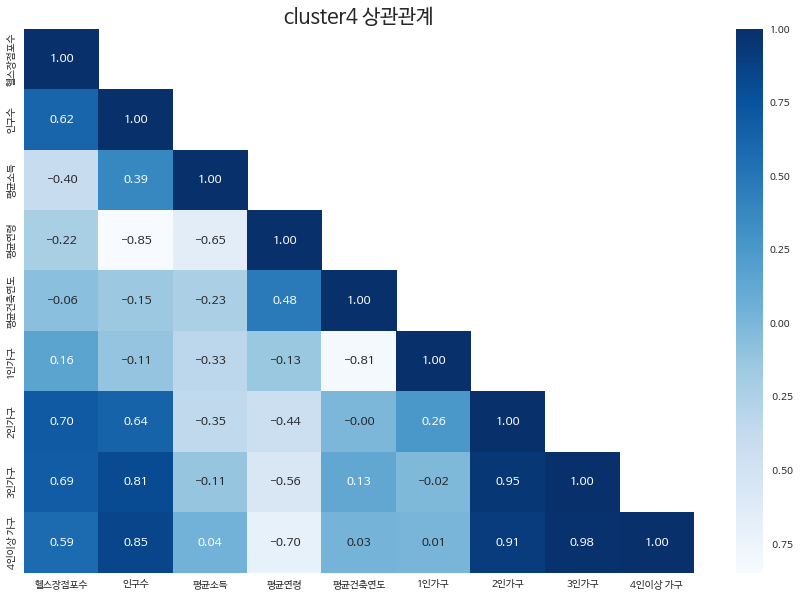

In [ ]:
#cluster=4 상관관계 시각화
corr = df_cluster4.corr()
mask = np.triu(np.ones_like(corr), k=1)

fit = plt.figure(figsize=(15, 10))
plt.title("cluster4 상관관계", size=20)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="Blues", mask=mask)

# 지도 시각화

In [ ]:
df_result2.head()

cluster 시군구명  헬스장점포수       인구수       평균소득  평균연령  평균건축연도     1인가구    2인가구  \
0        0  강남구     321  234612.0  3570568.0  41.9  2000.2   5999.9  4481.0   
1        0  관악구      38  279353.0  2603980.0  42.9  2002.4  11748.5  5105.6   
2        0  동작구      17  186419.0  2986681.0  43.5  2002.0   8012.6  5186.1   
3        0  서초구     205  169895.0  3459790.0  41.7  2003.4   4625.5  4091.3   
4        0  성동구      50  134533.0  3311064.0  43.4  2003.7   4731.7  3596.4   

     3인가구  4인이상 가구  
0  3713.3   3965.0  
1  3061.0   2717.4  
2  3989.8   3781.9  
3  3667.4   4049.7  
4  2780.3   2467.6

In [ ]:
df_seoul_filter2

상호명 상권업종대분류명 상권업종중분류명 상권업종소분류명    시도명  시군구명                 도로명주소  \
0     CC커뮤니케이션      스포츠   실내운동시설     헬스클럽  서울특별시   광진구  서울특별시 광진구 아차산로73길 48   
1       바디스토리짐      스포츠   실내운동시설     헬스클럽  서울특별시   도봉구  서울특별시 도봉구 도봉로145길 51   
2         스타트짐      스포츠   실내운동시설     헬스클럽  서울특별시   성동구   서울특별시 성동구 왕십리로21길 6   
3      김경영에어로빅      스포츠   실내운동시설     헬스클럽  서울특별시   중랑구      서울특별시 중랑구 봉우재로 4   
4        소울&바디      스포츠   실내운동시설     헬스클럽  서울특별시   서초구  서울특별시 서초구 서초대로55길 17   
...        ...      ...      ...      ...    ...   ...                   ...   
2497       짐티랩      스포츠   실내운동시설     헬스클럽  서울특별시   서초구    서울특별시 서초구 방배로6길 18   
2498        리핏      스포츠   실내운동시설     헬스클럽  서울특별시  영등포구  서울특별시 영등포구 버드나루로7길 3   
2499      센트럴짐      스포츠   실내운동시설     헬스클럽  서울특별시   용산구     서울특별시 용산구 서빙고로 17   
2500       로그짐      스포츠   실내운동시설     헬스클럽  서울특별시   서초구    서울특별시 서초구 사임당로 180   
2501      액티브핏      스포츠   실내운동시설     헬스클럽  서울특별시   강서구   서울특별시 강서구 강서로52길 16   

              경도         위도  cluster  
0     127.102417  37.546722        4  
1     127.039669  37.664516        2  
2     127.033372  37.561801        2  
3     127.073985  37.589113        2  
4     127.015094  37.496188        0  
...          ...        ...      ...  
2497  127.000472  37.479189        0  
2498  126.910324  37.522967        1  
2499  126.966551  37.526896        3  
2500  127.029255  37.492566        0  
2501  126.838932  37.557706        1  

[2502 rows x 10 columns]

In [ ]:
df_seoul_filter2.shape

(2502, 10)

In [ ]:
aaa = pd.pivot_table(data=df_result2, index="시군구명")
aaa = aaa[["인구수", "평균연령", "평균소득", "평균건축연도", "1인가구", "2인가구", "3인가구", "4인이상 가구"]]
aaa

인구수  평균연령       평균소득  평균건축연도     1인가구    2인가구    3인가구  4인이상 가구
시군구명                                                                     
강남구   234612.0  41.9  3570568.0  2000.2   5999.9  4481.0  3713.3   3965.0
강동구   201926.0  43.0  2997324.0  2005.3   5296.4  5025.1  4152.4   4172.6
강북구   144725.0  46.7  3096179.0  2002.3   6526.4  5204.6  3608.7   3203.9
강서구   272572.0  43.1  2897901.0  2001.6   8206.9  6207.1  4544.9   4288.5
관악구   279353.0  42.9  2603980.0  2002.4  11748.5  5105.6  3061.0   2717.4
광진구   169483.0  42.9  3024497.0  1998.7   7787.6  4547.5  3396.8   3278.9
구로구   181916.0  44.2  2996225.0  2001.5   5996.6  5355.1  4075.9   3876.4
금천구   118697.0  44.8  2678365.0  2001.7   7697.1  4787.5  3313.8   3007.1
노원구   219065.0  43.9  3081158.0  1993.4   5643.8  5420.1  4568.0   4637.6
도봉구   138836.0  46.1  2696466.0  1994.9   4651.2  4955.5  3821.1   3553.9
동대문구  169695.0  44.3  3005507.0  2005.5   8123.3  4909.2  3616.0   3401.2
동작구   186419.0  43.5  2986681.0  2002.0   8012.6  5186.1  3989.8   3781.9
마포구   180702.0  42.2  3086575.0  2003.9   7432.0  4772.8  3469.4   3229.4
서대문구  145044.0  43.9  3078408.0  2004.7   6648.4  4481.5  3412.7   3205.7
서초구   169895.0  41.7  3459790.0  2003.4   4625.5  4091.3  3667.4   4049.7
성동구   134533.0  43.4  3311064.0  2003.7   4731.7  3596.4  2780.3   2467.6
성북구   197296.0  43.7  3039502.0  2004.7   5858.1  4351.7  3479.9   3420.8
송파구   285106.0  42.2  3344283.0  2001.7   5263.9  4750.2  4084.9   4170.0
양천구   181765.0  42.8  2911485.0  1997.4   4151.2  4537.1  4263.5   4526.5
영등포구  188193.0  43.2  3055623.0  2001.8   6736.8  4308.0  3196.9   2851.8
용산구   111207.0  44.3  3249608.0  2003.0   4338.9  3051.9  2077.1   1791.1
은평구   215178.0  44.7  2937675.0  2007.1   6806.2  6416.7  4760.5   4443.6
종로구    73766.0  45.4  3379121.0  2005.2   2887.0  1809.0  1209.1   1140.2
중구     63767.0  45.8  2885928.0  2005.4   2852.2  1872.2  1162.6    998.3
중랑구   187693.0  45.3  2952789.0  2001.6   6659.4  5361.9  3836.7   3534.0

In [ ]:
df_result3 = pd.merge(left=df_seoul_filter2, right=aaa, on="시군구명", how="left")
print(df_result3.shape)
df_result3.head()

(2502, 18)


상호명 상권업종대분류명 상권업종중분류명 상권업종소분류명    시도명 시군구명                 도로명주소  \
0  CC커뮤니케이션      스포츠   실내운동시설     헬스클럽  서울특별시  광진구  서울특별시 광진구 아차산로73길 48   
1    바디스토리짐      스포츠   실내운동시설     헬스클럽  서울특별시  도봉구  서울특별시 도봉구 도봉로145길 51   
2      스타트짐      스포츠   실내운동시설     헬스클럽  서울특별시  성동구   서울특별시 성동구 왕십리로21길 6   
3   김경영에어로빅      스포츠   실내운동시설     헬스클럽  서울특별시  중랑구      서울특별시 중랑구 봉우재로 4   
4     소울&바디      스포츠   실내운동시설     헬스클럽  서울특별시  서초구  서울특별시 서초구 서초대로55길 17   

           경도         위도  cluster       인구수  평균연령       평균소득  평균건축연도    1인가구  \
0  127.102417  37.546722        4  169483.0  42.9  3024497.0  1998.7  7787.6   
1  127.039669  37.664516        2  138836.0  46.1  2696466.0  1994.9  4651.2   
2  127.033372  37.561801        2  134533.0  43.4  3311064.0  2003.7  4731.7   
3  127.073985  37.589113        2  187693.0  45.3  2952789.0  2001.6  6659.4   
4  127.015094  37.496188        0  169895.0  41.7  3459790.0  2003.4  4625.5   

     2인가구    3인가구  4인이상 가구  
0  4547.5  3396.8   3278.9  
1  4955.5  3821.1   3553.9  
2  3596.4  2780.3   2467.6  
3  5361.9  3836.7   3534.0  
4  4091.3  3667.4   4049.7

In [ ]:
cluster_lab = df_result3.groupby("cluster")["상권업종소분류명"].count()
df_cluster_lab = pd.DataFrame(cluster_lab)

lng_list = []
lat_list = []
for c in df_cluster_lab.index:
  lng = df_result3.loc[df_result3["cluster"]==c, "경도"].mean()
  lat = df_result3.loc[df_result3["cluster"]==c, "위도"].mean()
  lng_list.append(lng)
  lat_list.append(lat)

df_cluster_lab["경도"] = lng_list
df_cluster_lab["위도"] = lat_list

#데이터타입 변경
df_cluster_lab["상권업종소분류명"] = df_cluster_lab["상권업종소분류명"].astype("float")

df_cluster_lab

상권업종소분류명          경도         위도
cluster                                 
0           692.0  127.023753  37.506689
1           539.0  126.877219  37.517044
2           453.0  127.047835  37.612895
3           424.0  126.940011  37.564416
4           394.0  127.110514  37.524020

In [ ]:
import json
state_geo = "https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json"

In [ ]:
map = folium.Map(location=[df_result3["위도"].mean(), df_result3["경도"].mean()], zoom_start=11)

map.choropleth(geo_data=state_geo,
               data=df_cluster_lab["상권업종소분류명"],
               fill_color="YlOrRd",
               key_on = "feature.properties.name",
               fill_opacity=0.2,
               line_opacity=0.7,
               highlight=True)

for cl in df_cluster_lab.index:
  gym_count = df_cluster_lab.loc[cl, "상권업종소분류명"] / df_cluster_lab["상권업종소분류명"].sum() * 250

  msg = f"{cl}번째 클러스터 헬스클럽 매장 비율: {gym_count/2.5: .0f}%"

  icon_color="blue"

  folium.CircleMarker(
      location=[df_cluster_lab.loc[cl, "위도"], df_cluster_lab.loc[cl, "경도"]],
      radius = gym_count,
      color = icon_color,
      popup = msg,
      fill = True,
      fill_color = icon_color
  ).add_to(map)

map

In [ ]:
map = folium.Map(location=[df_result3["위도"].mean(), df_result3["경도"].mean()], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data=state_geo,
               fill_color="YlOrRd",
               key_on="feature.properties.name",
               fill_opacity=0.2,
               line_opcity=0.5,
               highlight=True)

for n in df_result3.index:
  popup_name = df_result3.loc[n, "상호명"] + "-" + df_result3.loc[n, "도로명주소"]

  #클러스터별 색상 정하기
  if df_result3.loc[n, "cluster"] == 0:
    icon_color="green"
  elif df_result3.loc[n, "cluster"] == 1:
    icon_color="red"
  elif df_result3.loc[n, "cluster"] == 2:
    icon_color="blue"
  elif df_result3.loc[n, "cluster"] == 3:
    icon_color="yellow"
  elif df_result3.loc[n, "cluster"] == 4:
    icon_color="purple"

  folium.CircleMarker(
      location = [df_result3.loc[n, "위도"], df_result3.loc[n, "경도"]],
      radius = 3,
      popup = popup_name,
      color = icon_color,
      fill = True,
      fill_color = icon_color
  ).add_to(map)

map

In [ ]:
df_result3.head(3)

상호명 상권업종대분류명 상권업종중분류명 상권업종소분류명    시도명 시군구명                 도로명주소  \
0  CC커뮤니케이션      스포츠   실내운동시설     헬스클럽  서울특별시  광진구  서울특별시 광진구 아차산로73길 48   
1    바디스토리짐      스포츠   실내운동시설     헬스클럽  서울특별시  도봉구  서울특별시 도봉구 도봉로145길 51   
2      스타트짐      스포츠   실내운동시설     헬스클럽  서울특별시  성동구   서울특별시 성동구 왕십리로21길 6   

           경도         위도  cluster       인구수  평균연령       평균소득  평균건축연도    1인가구  \
0  127.102417  37.546722        4  169483.0  42.9  3024497.0  1998.7  7787.6   
1  127.039669  37.664516        2  138836.0  46.1  2696466.0  1994.9  4651.2   
2  127.033372  37.561801        2  134533.0  43.4  3311064.0  2003.7  4731.7   

     2인가구    3인가구  4인이상 가구  
0  4547.5  3396.8   3278.9  
1  4955.5  3821.1   3553.9  
2  3596.4  2780.3   2467.6

In [ ]:
sector_gu_df2 = pd.DataFrame(df_result3.groupby(["cluster", "시군구명"])["상권업종소분류명"].count())
sector_gu_df2.to_excel("220803_클러스터별_구별_점포개수.xlsx")

In [ ]:
sector_gu_df = pd.pivot_table(data=df_result3, index="cluster", values="상권업종소분류명", columns="시군구명", aggfunc="count")
sector_gu_df.to_excel("220803_클러스터별_구별_점포갯수.xlsx")

In [ ]:
df_result3.to_excel("220803_최종분석데이터.xlsx")

In [ ]:
aaa = pd.read_excel("/content/220803_최종분석데이터.xlsx")
aaa.head()

Unnamed: 0       상호명 상권업종대분류명 상권업종중분류명 상권업종소분류명    시도명 시군구명  \
0           0  CC커뮤니케이션      스포츠   실내운동시설     헬스클럽  서울특별시  광진구   
1           1    바디스토리짐      스포츠   실내운동시설     헬스클럽  서울특별시  도봉구   
2           2      스타트짐      스포츠   실내운동시설     헬스클럽  서울특별시  성동구   
3           3   김경영에어로빅      스포츠   실내운동시설     헬스클럽  서울특별시  중랑구   
4           4     소울&바디      스포츠   실내운동시설     헬스클럽  서울특별시  서초구   

                  도로명주소          경도         위도  cluster     인구수  평균연령  \
0  서울특별시 광진구 아차산로73길 48  127.102417  37.546722        4  169483  42.9   
1  서울특별시 도봉구 도봉로145길 51  127.039669  37.664516        2  138836  46.1   
2   서울특별시 성동구 왕십리로21길 6  127.033372  37.561801        2  134533  43.4   
3      서울특별시 중랑구 봉우재로 4  127.073985  37.589113        2  187693  45.3   
4  서울특별시 서초구 서초대로55길 17  127.015094  37.496188        0  169895  41.7   

      평균소득  평균건축연도    1인가구    2인가구    3인가구  4인이상 가구  
0  3024497  1998.7  7787.6  4547.5  3396.8   3278.9  
1  2696466  1994.9  4651.2  4955.5  3821.1   3553.9  
2  3311064  2003.7  4731.7  3596.4  2780.3   2467.6  
3  2952789  2001.6  6659.4  5361.9  3836.7   3534.0  
4  3459790  2003.4  4625.5  4091.3  3667.4   4049.7

In [ ]:
bbb = pd.pivot_table(data=aaa, index="cluster")
bbb

1인가구         2인가구         3인가구      4인이상 가구   Unnamed: 0  \
cluster                                                                    
0        5681.141474  4196.597254  3435.242775  3596.638295  1222.559249   
1        7338.296104  5205.359740  3906.473840  3716.777922  1242.940631   
2        5986.094923  4779.106623  3647.218543  3465.222517  1297.474614   
3        6113.049528  4372.583255  3199.857783  2963.653538  1234.700472   
4        5949.542893  4749.159645  3899.985025  3919.208629  1272.908629   

                 경도         위도            인구수       평균건축연도          평균소득  \
cluster                                                                    
0        127.023753  37.506689  197369.683526  2001.875145  3.413825e+06   
1        126.877219  37.517044  214404.643785  2001.031911  2.887230e+06   
2        127.047835  37.612895  169520.264901  2000.598675  3.002180e+06   
3        126.940011  37.564416  157338.693396  2004.586085  3.056829e+06   
4        127.110514  37.524020  230781.494924  2001.804315  3.180916e+06   

              평균연령  
cluster             
0        42.293931  
1        43.370872  
2        44.843267  
3        43.886085  
4        42.584010

In [ ]:
df_result2.head()

cluster 시군구명  헬스장점포수       인구수       평균소득  평균연령  평균건축연도     1인가구    2인가구  \
0        0  강남구     321  234612.0  3570568.0  41.9  2000.2   5999.9  4481.0   
1        0  관악구      38  279353.0  2603980.0  42.9  2002.4  11748.5  5105.6   
2        0  동작구      17  186419.0  2986681.0  43.5  2002.0   8012.6  5186.1   
3        0  서초구     205  169895.0  3459790.0  41.7  2003.4   4625.5  4091.3   
4        0  성동구      50  134533.0  3311064.0  43.4  2003.7   4731.7  3596.4   

     3인가구  4인이상 가구  
0  3713.3   3965.0  
1  3061.0   2717.4  
2  3989.8   3781.9  
3  3667.4   4049.7  
4  2780.3   2467.6

In [ ]:
import statsmodels.api as sm

x_data = df_result2[df_result2["cluster"]==0][["인구수", "평균소득", "평균연령", "평균건축연도", "1인가구", "2인가구", "3인가구", "4인이상 가구"]]
target = df_result2[df_result2["cluster"]==0][["헬스장점포수"]]

multi_model = sm.OLS(target, x_data)
fitted_multi_model = multi_model.fit()
print(fitted_multi_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 헬스장점포수   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Thu, 04 Aug 2022   Prob (F-statistic):                nan
Time:                        06:56:22   Log-Likelihood:                 169.65
No. Observations:                   7   AIC:                            -325.3
Df Residuals:                       0   BIC:                            -325.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
인구수            0.0040        inf          0        n

In [ ]:
x_data

인구수       평균소득  평균연령  평균건축연도     1인가구    2인가구    3인가구  4인이상 가구
0  234612.0  3570568.0  41.9  2000.2   5999.9  4481.0  3713.3   3965.0
1  279353.0  2603980.0  42.9  2002.4  11748.5  5105.6  3061.0   2717.4
2  186419.0  2986681.0  43.5  2002.0   8012.6  5186.1  3989.8   3781.9
3  169895.0  3459790.0  41.7  2003.4   4625.5  4091.3  3667.4   4049.7
4  134533.0  3311064.0  43.4  2003.7   4731.7  3596.4  2780.3   2467.6
5  111207.0  3249608.0  44.3  2003.0   4338.9  3051.9  2077.1   1791.1
6   63767.0  2885928.0  45.8  2005.4   2852.2  1872.2  1162.6    998.3

In [ ]:
x_data_copy = pd.DataFrame(x_data.mean()).T
target_copy = pd.DataFrame(target.mean()).T
target_copy

헬스장점포수
0  98.857143

In [ ]:
multi_model = sm.OLS(target_copy, x_data_copy)
fitted_multi_model = multi_model.fit()
print(fitted_multi_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 헬스장점포수   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 04 Aug 2022   Prob (F-statistic):                nan
Time:                        07:06:56   Log-Likelihood:                    inf
No. Observations:                   1   AIC:                              -inf
Df Residuals:                       0   BIC:                              -inf
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
인구수         1.672e-06        nan        nan        n

In [ ]:
df_seoul_filter2.head()

상호명 상권업종대분류명 상권업종중분류명 상권업종소분류명    시도명 시군구명                 도로명주소  \
0  CC커뮤니케이션      스포츠   실내운동시설     헬스클럽  서울특별시  광진구  서울특별시 광진구 아차산로73길 48   
1    바디스토리짐      스포츠   실내운동시설     헬스클럽  서울특별시  도봉구  서울특별시 도봉구 도봉로145길 51   
2      스타트짐      스포츠   실내운동시설     헬스클럽  서울특별시  성동구   서울특별시 성동구 왕십리로21길 6   
3   김경영에어로빅      스포츠   실내운동시설     헬스클럽  서울특별시  중랑구      서울특별시 중랑구 봉우재로 4   
4     소울&바디      스포츠   실내운동시설     헬스클럽  서울특별시  서초구  서울특별시 서초구 서초대로55길 17   

           경도         위도  cluster  
0  127.102417  37.546722        4  
1  127.039669  37.664516        2  
2  127.033372  37.561801        2  
3  127.073985  37.589113        2  
4  127.015094  37.496188        0

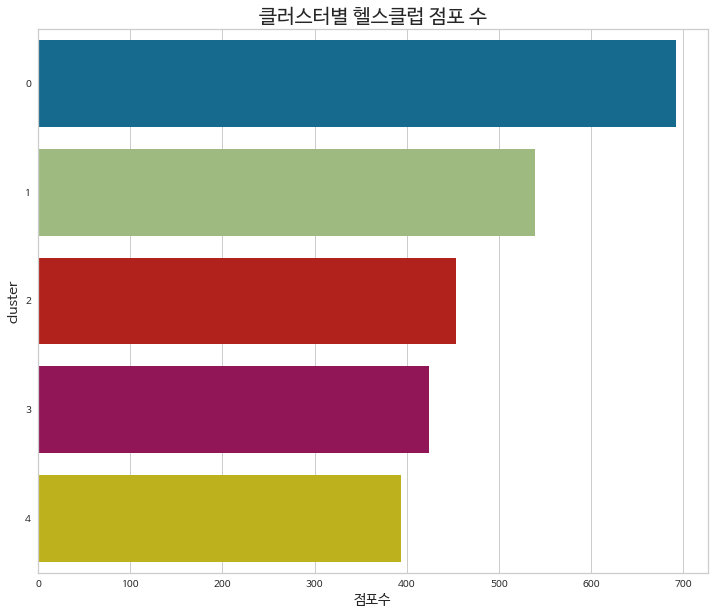

In [ ]:
fig = plt.figure(figsize=(12, 10))
plt.title("클러스터별 헬스클럽 점포 수", size=20)
sns.countplot(data=df_seoul_filter2, y="cluster", order=df_seoul_filter2["cluster"].value_counts().index)
plt.xlabel("점포수", fontsize=14)
plt.ylabel("cluster", fontsize=14)
plt.show()

In [ ]:
aaa_copy = aaa.iloc[:, 10:]
pd.pivot_table(data=aaa_copy, index="cluster").round(1)

1인가구    2인가구    3인가구  4인이상 가구       인구수  평균건축연도       평균소득  평균연령
cluster                                                                    
0        5681.1  4196.6  3435.2   3596.6  197369.7  2001.9  3413825.4  42.3
1        7338.3  5205.4  3906.5   3716.8  214404.6  2001.0  2887230.1  43.4
2        5986.1  4779.1  3647.2   3465.2  169520.3  2000.6  3002180.4  44.8
3        6113.0  4372.6  3199.9   2963.7  157338.7  2004.6  3056829.1  43.9
4        5949.5  4749.2  3900.0   3919.2  230781.5  2001.8  3180916.5  42.6

In [ ]:
df_seoul_filter2.groupby("cluster").count()

상호명  상권업종대분류명  상권업종중분류명  상권업종소분류명  시도명  시군구명  도로명주소   경도   위도
cluster                                                               
0        692       692       692       692  692   692    692  692  692
1        539       539       539       539  539   539    539  539  539
2        453       453       453       453  453   453    453  453  453
3        424       424       424       424  424   424    424  424  424
4        394       394       394       394  394   394    394  394  394